In [4]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/CSV_file/FVTrain_20Class.csv')
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

/home/yupaporn/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2049) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,2044,2045,2046,2047,Case,15AB,Class,SubPosition,Views,Sub_class_New
0,0.160457,0.901754,-0.095135,-0.015717,-0.079120,-0.164944,0.374934,0.134212,-0.174954,-0.182251,...,0.584165,0.684357,0.738636,-0.038702,AB01_15,MildFattyLiver,Abnormal,P31,FP-B,AB01
1,0.033173,0.726811,-0.121359,-0.011929,0.007653,-0.183892,0.487158,0.051630,-0.115517,-0.155750,...,0.388101,0.753684,0.548613,-0.091524,AB01_15,MildFattyLiver,Abnormal,P1,FP-A,AB01
2,-0.102892,0.646232,-0.073065,0.087293,0.193535,-0.172595,0.607716,-0.075694,-0.146095,-0.194684,...,0.683081,0.662323,0.433110,0.033025,AB01_15,MildFattyLiver,Abnormal,P2,FP-A,AB01
3,0.038968,0.479386,0.079918,-0.154050,0.150541,-0.003634,0.443206,-0.045163,-0.150804,-0.169418,...,0.246771,0.294574,0.299174,-0.129578,AB01_15,MildFattyLiver,Abnormal,P42,FP-B,AB01
4,0.059911,0.207812,-0.180650,-0.087309,0.174356,-0.183723,0.369602,-0.116254,-0.143960,-0.106292,...,0.310855,0.928555,0.781129,-0.149236,AB01_15,MildFattyLiver,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,-0.046794,0.049360,-0.085686,0.769817,0.049823,-0.029628,-0.159061,-0.172973,-0.049274,-0.031438,...,-0.157882,-0.131303,0.491071,-0.049946,AB17_05,LiverCyst,Abnormal,NaN,NaN,AB17
5296,0.412856,-0.098408,-0.165534,0.765477,-0.164004,0.791747,-0.115439,-0.047477,-0.163614,-0.015490,...,-0.134834,0.133897,-0.030719,-0.027994,AB17_08,LiverCyst,Abnormal,NaN,NaN,AB17
5297,-0.052654,0.149418,-0.109825,0.072172,0.052574,0.878487,-0.173367,0.014987,0.116442,0.072380,...,-0.133054,-0.109113,-0.075093,0.055705,AB17_20,LiverCyst,Abnormal,NaN,NaN,AB17
5298,0.721692,-0.108977,-0.057211,0.700875,-0.111954,1.018799,-0.138699,-0.017943,-0.130606,-0.050650,...,-0.129623,0.152578,0.040689,0.165582,AB17_09,LiverCyst,Abnormal,NaN,NaN,AB17


In [27]:
!pwd

/home/yupaporn/codes/Evaluation_Model_Prediction


In [5]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2053]
print(X.shape)
print(y.shape)

(5300, 2048)
(5300,)


In [6]:
y[0]


'AB01'

# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [8]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [9]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.997358,0.001729,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.997170,0.001740,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.997170,0.001740,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.997170,0.001740,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.993774,0.001474,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.998113,0.001462,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.997736,0.001412,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.997358,0.001729,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.997358,0.001729,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.993962,0.001412,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [10]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.9973584905660378

 **print the array of mean scores only 

[0.99735849 0.99716981 0.99716981 0.99716981 0.99377358 0.99811321
 0.99773585 0.99735849 0.99735849 0.99396226 0.99830189 0.99773585
 0.99773585 0.99735849 0.99415094 0.99830189 0.99811321 0.99773585
 0.99754717 0.99415094 0.99830189 0.99811321 0.99773585 0.99754717
 0.99415094]

 **examine the best model 

0.998301886792453
{'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=25, n_estimators=400, random_state=1)


In [12]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.998301886792453


# setting parameters

In [13]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 25, n_estimators = 400, min_samples_split =2)
             
modelOpt = forestOpt.fit(X, y)# 

In [14]:
# dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold1_3.csv')
dataframe = pd.read_csv( '/home/yupaporn/CSV_file/FVTest_20Class.csv')

/home/yupaporn/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2053) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2052]
print(X_test.shape)
print(y_test.shape)

(1328, 2048)
(1328,)


In [22]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,-0.116260,0.152747,0.128437,-0.168914,0.335952,-0.163506,0.289471,-0.164157,-0.112088,-0.215092,...,-0.169851,-0.232993,0.206899,0.081048,0.087011,-0.066176,0.384215,0.367078,0.308215,0.186078
1,0.152884,0.795259,-0.123939,-0.017086,0.057468,-0.173887,-0.051378,-0.090190,-0.182105,-0.200674,...,-0.150101,-0.179804,-0.033863,0.235776,-0.013047,-0.137038,0.175562,0.951276,0.511054,-0.008626
2,-0.108036,0.222573,0.067775,-0.089766,0.408120,-0.149850,0.461682,-0.207285,-0.163504,-0.101215,...,-0.108718,-0.183009,0.355673,-0.105422,0.328273,-0.160713,0.189675,0.431935,0.580330,-0.085403
3,-0.125039,0.211511,-0.111375,-0.057722,0.173165,-0.168334,0.138246,-0.192431,-0.193078,0.013967,...,-0.160995,-0.110600,0.134484,0.112681,0.059404,-0.021892,0.040524,0.448308,0.273445,-0.077635
4,-0.138636,0.282204,0.079704,-0.140916,0.242556,-0.070813,0.036644,-0.214607,-0.164184,-0.233235,...,-0.107751,-0.182548,0.400585,-0.085239,0.082974,0.433801,0.171166,0.015500,-0.070414,-0.050668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,0.842265,-0.027261,-0.087388,0.621318,-0.032711,1.400617,-0.088790,0.064123,0.041764,0.075889,...,0.746690,0.370330,1.187810,0.032654,0.285755,0.191604,-0.146465,-0.075858,-0.052954,0.211670
1324,-0.141186,-0.144963,-0.104052,-0.095101,-0.098736,1.153870,-0.183229,0.007238,-0.164956,0.528242,...,0.509736,1.042801,0.886454,0.154516,-0.015915,-0.024125,-0.143352,-0.140889,-0.179928,0.278095
1325,0.189770,0.063335,0.037303,0.396096,0.215092,0.905744,-0.127738,0.300558,-0.108303,0.037657,...,0.221734,0.117664,0.823608,0.300957,0.365588,-0.122770,-0.168415,0.066926,-0.184219,0.346662
1326,0.461212,-0.056154,-0.046821,0.539387,0.137011,1.332201,-0.053079,0.014405,0.112205,0.189531,...,0.738416,0.663533,0.474897,0.042114,0.173407,-0.162668,-0.136076,0.338469,-0.076092,0.155252


In [21]:
y_test

0       AB01
1       AB01
2       AB01
3       AB01
4       AB01
        ... 
1323    AB17
1324    AB17
1325    AB17
1326    AB17
1327    AB17
Name: Sub_class_New, Length: 1328, dtype: object

In [23]:
y_pred = modelOpt.predict(X_test)

In [26]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

              precision    recall  f1-score   support

        AB01       0.81      0.65      0.72        74
        AB02       0.63      0.61      0.62        59
        AB03       0.43      0.32      0.36        19
        AB04       0.93      0.66      0.77        38
        AB05       0.84      0.55      0.67        29
        AB06       0.77      0.48      0.59        21
        AB07       0.75      0.57      0.65        21
       AB081       0.86      0.56      0.68        32
       AB082       0.80      0.57      0.67        28
       AB083       0.86      0.55      0.67        11
        AB09       0.95      0.81      0.88        26
        AB10       0.89      0.80      0.84        10
        AB11       0.95      0.95      0.95        55
        AB12       0.96      0.84      0.90        32
        AB13       0.00      0.00      0.00         2
        AB14       0.00      0.00      0.00         2
        AB15       0.67      1.00      0.80         4
        AB16       0.00    

/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Text(0.5, 21.5, 'Predicted label')

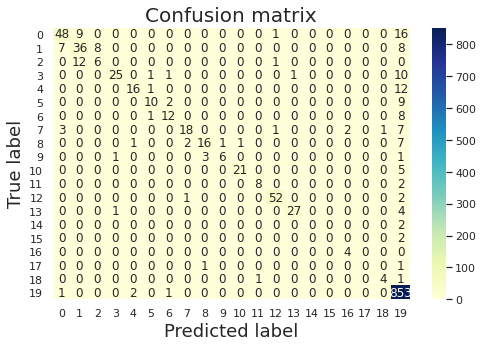

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [16]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_AN_AN_fold1_3.pkl" 
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)